# Run this cell first

In [ ]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  %pip install AutoFeedback
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  %pip install "git+https://github.com/autofeedback-exercises/exercises.git#subdirectory=New-SOR3012/Histograms"
  from testsrc import test_main

def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except AssertionError:
      pass


# Introduction

The exercises in this block serve to revise the concept of the probablity mass function for a discrete random variable.  We are going to revise how this function is defined and we are going to study how to estimate the probability mass function from a series of samples.  In other words, we are going to study how to estimate a histogram.

Before starting on the exericse please watch the following five-minute video that revises what a histogram is.


In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/stgzDnPj1F8?si=rrczNZRb7SHlOAzq" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

Once you have watched the video run the following cell and load the usual set of libraries.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Counting successes and failures

We will start this exercise by doing something that by now should be very familiar.  We are going to write a function that generates a series of Bernoulli random variables.  Now, however, I want you to calculate the number of failures in these
n trials as well as the number of successes.

To complete the exercise you will need to do the following:

1. You will need to write a function called `bernoulli` that takes a parameter `p` (the probability of success) and that returns a Bernoulli random variable.
2. You will need to modify the function called `repeated_trials`.  This function takes two parameters `n` (the number of trials to perform) and `p` (the probability of success in each trial).  It should return two numbers `nsuccess` and `nfail`, which will give the number of successes and the number of failures respectively.  Within this function you will need to write the code to generate the `n` Bernoulli variables required and to compute `nsuccess` and `nfail`.


In [ ]:
def bernoulli(p) :
  # Your code to generate a bernoulli random variable goes here

def repeated_trials(n,p) :
  nsuccess, nfail = 0, 0
  # Your code to generate n bernoulli trials and to count the number of
  # successes and failures goes here.

  return nsuccess, nfail

print( repeated_trials(10,0.2) )
print( repeated_trials(10,0.2) )
print( repeated_trials(10,0.2) )
print( repeated_trials(10,0.2) )


In [ ]:
runtest(['test_bernoulli', 'test_trials'])

# Plotting numbers of successes and failures

We should now be able to use something similar to the code that we wrote in the previous execise to estimate our histogram.  The basic idea is explained in the following seven-minute video.

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/l2h9oNUCJsM?si=RincTLOGh9aK5c7k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

Lets try to use the ideas in the video to estimate the probablity mass function for the Bernoulli random variable that you wrote a function to generate in the previous execise.  To complete this task:

1. You will need to modify the loop that comes immediately after the function called `bernoulli` so that within this loop 100 Bernoulli random variables with parameter `prob` are generated.  In addition, you should, within this loop, count the number of times these trials were failures in element 0 of the array called `counts` and the number of times these trials were successful in element 1 of the array called `counts`.
2. You need to modify the final loop in the code to the right so that the first element of the array called `counts` is equal to the fraction of failures and the second element of the array called `counts` is equal to the fraction of successes.

Notice that when you are counting the number of successes and failures in the elements of the list called counts you do not need to use an if statement.  Instead, you can do the following:

```python
myvar = bernoulli(p)
counts[int(myvar)] = counts[int(myvar)] + 1
```

This works because if the trial was unsuccessful the function `bernoulli` returns a 0.  Consequently, the code above will modify element 0 of the list.  By contrast, if the trial is successful `bernoulli` returns a 1 and the above code will modify element 1 of the list.
If you complete the exercise correctly an estimate of the probability mass function will be generated and shown.

N.B. The `int` command converts the real number that is output by `bernoulli` into an integer so that it can be used to refer to a particular element of the list.

In [ ]:
prob, counts = 0.3, np.zeros(2)
# Your code to generate n bernoulli trials and to count the number of
# successes and failures goes here.
for i in range(100) :

# Your code to ensure that the sum of the two heights is equal to one
# and that the bar chart plotted is thus an estimate for the probablity
# mass function goes here.
for i in range(2) :


# This will draw a bar chart showing the fraction of successes and
# the fraction of failures.
plt.bar( [0,1], counts, width=0.1 )
plt.xlabel('Outcome')
plt.ylabel('Probability')

# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()



In [ ]:
runtest(['test_plot_1'])

# Estimating the histogram for a binomial random variable

We are now going to merge this business of computing a histogram with what you know about generating different types of random variables.  In this exercise for instance I would like you to generate a histogram for a binomial random variable.  In order to do this you will need to:

1. Write a function called `binomial` that takes parameters `n` (the number of trials to perform) and `p` (the probability of success in each of these trials) and that returns a binomial random variable.
2. Write a loop that generates multiple binomial random variables with parameters `nparam` and `prob` using the function called `binomial`.  You should use the list called `counts` to count how often each of the various outcomes in the sample space for this type of random variable appears just as you did for the random variable in the previous exercise.  In addition, you will also notice that you need to set the variable `noutcomes` equal to the number of possible values that the random variable can take.
3. You need to write a loop that converts each of the quantities in the list called `counts` from the number of times that the random variable was equal to a particular value into the fraction that the random variable took on this particular value.  In addition, you need to set the elements of the list called `sample_space` equal to the values that you would like to be plotted on the x-axis of your histogram.
4. You need to plot the estimate for the probablity mass function.  In your graph you should use __Random variable value__ as the x-axies label and __Fraction of occurances__ as the y-axis label.

The final result should resemble the probability mass function for a binomial random variable with parameters `nparam` and `prob`.


In [ ]:
def binomial(n, p) :
  # Your code to generate a binomial random variable goes here

# This variable is the number of random variables we are going to generate
nsamples=200
nparam, prob = 8, 0.3
noutcomes =
counts = np.zeros(noutcomes)
for i in range(nsamples) :
  # Your code to generate multiple binomial variables using the function
  # called binomial above and to count how often each outcome comes
  # up goes here.


sample_space = np.zeros(0)
for i in range(noutcomes) :
  # Your function to convert the count of the number of times each
  # value for the random variable comes up to the fraction of times
  # each outcome comes up goes here.  You should also set the elements
  # of the list sample_space to the various values in the sample space for this particular random variable so that the plot appears correctly.



In [ ]:
runtest(['test_plot_2'])

# Plotting the probability mass function

The heights of the bars in the histogram that you have just plotted are all random variables. Furthermore, the histogram is an estimate for the probablity mass function and not the true probablity mass, which is defined in the manner discussed in the following video.  

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/5qGlpl76t1A?si=pahHbVCDwZANJMaP" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

__Your task in this exercise is to plot two bar charts.__  One of these bar charts should show the exact probablity mass function for a discrete uniform random variable that can take any integer value that is greater than or equal to 1 and less than or equal to 6.  The second should show the probablity mass function for a binomial random variable with n=6 and p=0.5.  Notice that you can calculate the exact probability mass function for a binomial random variable by using scipy as follows:

```python
# Calculate P(X=x) where X is a binomial random variable with parameters n and p
p = scipy.stats.binom.pmf( x, n, p )
```

See [this](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) website for more details.

Notice that I have written stub code below to plot the two probablity mass functions side by side.  In your final figure the probablity mass function for the uniform discrete random variable will appear in blue while the probablity mass function for the binomial random variable plot will appear in red.  

Functions exist for plotting the probablity mass/density functions for other types of random vairables.  You can find information here:

* [Geometric](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)
* [Negative binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html)
* [Exponential](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)
* [Normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [ ]:
# This sets the x-coordinates for your bar charts
xvals = np.linspace(0,6,7)

# Your code for setting the values in uniform_pmf and binom_pmf goes here




# This is the part for plotting the probablity mass functions
# side by side.  Notice that the x-coordinates
# define the position of the centers of the bars.  You
# thus get the center of the two side by side bars to appear at
# the coordinates in xvals by shifting one set of bars left
# by half the width of the bar and the other set of bars
# right by half the width of the bar.
plt.bar( xvals-0.05, uniform_pmf, width=0.1, color='blue' )
plt.bar( xvals+0.05, binom_pmf, width=0.1, color='red' )
plt.xlabel('x')
plt.ylabel('P(X=x)')


# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

In [ ]:
runtest(['test_plot'])

# Histograms and Percentiles

Notice that the heights of the bars in a histogram that we generate by sampling random variables are all averages.  In other words, the heights of the bars in a histogram are all random variables.  We should thus quote error bars on these error bars to make our results reproducible.  The following video explains how you can calculate tehse errors by resampling.

In [4]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9nLQ8KGIdwQ?si=OSsidmtWKLeM4oXK" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

The cell below provides you with an opportunity to implement the ideas from the video.  I have done a lot of the work for you here you still have to do a few things; namely:

1. You have to write a function called `dice_roll` that returns the (random) outcome of a roll of a fair six-sided dice.  Remember that when we roll a fair, six-sided dice we are generating a uniform discrete random variable that can take values of 1, 2, 3, 4, 5 or 6.
2. You need to write a function called `histo_esimtate` that takes a parameter called `n`.   Within this function, you should compute a histogram by taking `n` samples using your `dice_roll` function.  The fraction of times you get each of the six possible outcomes on rolling the dice should be stored in the array called `histo`, which will be returned from your function.
3. You need to work out how to set the elements of the array `upper`.  The elements of this array should be set equal to the difference between the 95th percentile of the distribution of histogram estimates and the median for the distribution of histogram estimates.  N.B. This number should be positive.

When you have written this code and run the code a graph showing the histogram with suitable error bars on each of the bars in this is produced.  Look at the code that I have written and try to understand how it works.  We are only using ideas about
percentiles that you have learned about in this course.  It is a little more complicated, however, as we have to use two dimensional NumPy arrays as we are estimating multiple random variables simultaneously.

Please note that the code checks the values of the error bars that are stored in the arrays called lower and upper.  You must therefore have these arrays defined in your code in order to pass the test

In [ ]:
def dice_roll() :
  # Insert code so that this function return  the outcome of a roll of a fair six sided dice here.

def histo_estimate(n) :
    histo = np.zeros(6)
    # Insert code to compute a histogram if you roll the dice n times here.

    return histo

# This tells us that 50 (nsamples) random variables should be used in the generation of each histogram
# This procedure of generating 50 random variables and calculating the histogram should then
# be repeated 500 (nresamples) times.
nsamples, nresamples = 50, 500
# This loop resamples your histogram
histo_samples = np.zeros([nresamples,6])
for i in range(nresamples) : histo_samples[i] = histo_estimate(nsamples)

# This computes percentiles from your histogram
lower, upper, median = np.zeros(6), np.zeros(6), np.zeros(6)
for i in range(6) :
    # We find the median
    median[i] = np.median( histo_samples[:,i] )
    # Generally we quote the error by saying that the the value is between
    # median - lower and median + upper.  When we compute percentiles we are
    # getting values for median - lower and median + upper so we have to
    # do some sums to get the values of lower and upper that we want.
    lower[i] = median[i] - np.percentile( histo_samples[:,i], 5 )
    upper[i] =

plt.bar( [1,2,3,4,5,6], median, width=0.1 )
# This plots the small bar around each of the values.
plt.errorbar( [1,2,3,4,5,6], median, yerr=[lower,upper], fmt='ko' )

# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

In [ ]:
runtest(['test_dice', 'test_histo', 'test_lower', 'test_upper', 'test_plot_3'])

# Error bars for histograms

We can also use the central limit theorem to calculate error bars for histograms.  We can thus avoid resampling our error bar in the way I showed you previously. The way this is done in practise is explained in the following video 

In [5]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/UqRU6LtmJRA?si=P_7pHn_AEgm6xgD6" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

Lets use what we have learned from the video to write a program that calculates error bars that can be shown on a histogram using the central limit theorem.  Our histogram is going to be an estimate for the probability mass function for a binomial random variable so to complete the exercise you are going to need to:

1. Write a loop that calls the `binomial` function that you wrote for an earlier exercise `nsamples` times with `n=5` and `p=0.5` and that accumulates a histogram.  You should use the list called `histo` to accumulate how often each of the six possible outcomes appears in your sample of `nsamples` binomial random variables.
2. Normalize the histogram in `histo` so that you obtain an estimate for the probability mass.

Once you have completed steps 1-3 above you are in a position where you can calculate the error bars.  To compute the error bars notice that the height of each bar in your normalised histogram is a sample mean computed from `nsamples` Bernoulli random variables.  In other words, the height of each bar in the histogram is an estimate of the parameter of a Bernoulli random variable, `p`.  We can thus approximate the sample variance of this Bernoulli random variable using:

$$
\sigma^2 = p(1-p)
$$

where $p$ is simply the height of the histogram bar that you have stored in the list called `histo`.  You should thus be able to calculate the confidence limits on each of your histogram bars by using the estimate of the variance that you obtain from the above formula together with what you know from the central limit theorem.  I would like you to plot an error bar that represents the 90% confidence limit on your estimate of the height of the bar.   To do this you will need to set the elements of the list called `error` equal to the
width of an error bar that represents a 90% confidence limit.  Notice that the width of an error bar for a 90% confidence limit is equal to the 95th percentile of the distribution minus the mean of the distribtution.

In [ ]:
nsamples = 500
histo = np.zeros(6)
# Insert code to compute a histogram by generating nsamples binomial random variables with
# n=5 and p=0.5 here.

# Don't forget to normalise your histogram.


# Include the code to compute the error bars at the 90% confidence limit here.  The list
# called error should contain the difference between the 95th percentile for the distribution of the
# mean and the mean
error = np.zeros(6)


# This will plot the histogram and the error bars
plt.bar( [0,1,2,3,4,5], histo, width=0.1 )
# This plots the small bar around each of the values.
plt.errorbar( [0,1,2,3,4,5], histo, yerr=error, fmt='ko' )
plt.xlabel('Outcome')
plt.ylabel('Fraction of occurances')


# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()


In [ ]:
runtest(['test_binom', 'test_error', 'test_plot_4'])

# Taking it further

A nice exercise to do to consolidate the ideas that were covered in this notebook is to generate an estimate for the probability mass function for one of the random variables by sampling.  You should obviously quote errors on this estimate using one of the two methods that I have described in the last two exercises above.  You can do this for any one of the following variables:

* Binomial random variable
* Geometric random variable
* Negative binomial random variable
* Hypergeometric random variable

You can then create a plot similar to the one that is generated by the code shown below.  In this figure, the estimate of the probability mass function for a Bernoulli random variable is shown with error bars. The true probablity mass function for the random variable is shown as solid bars.  The error bars indicate a 66% confidence limit on the estimate of the probability mass function.

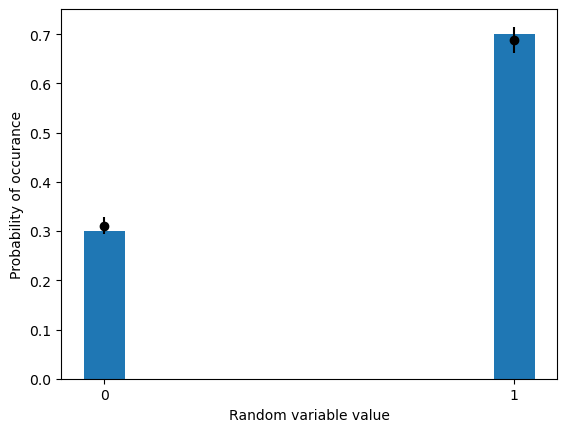

In [9]:
nsamples, counts = 1000, np.zeros(2)
for i in range(nsamples) : 
    if np.random.uniform(0,1)<0.3 : counts[0] = counts[0] + 1
    else : counts[1] = counts[1] + 1
        
counts = counts / nsamples
errors = np.sqrt( counts / nsamples )

xvals, true_pmf = np.array([0,1]), np.array([0.3,0.7])
plt.errorbar( xvals, counts, yerr=errors, fmt='ko' )
plt.bar( xvals, true_pmf, width=0.1 )
plt.xlabel("Random variable value")
plt.xticks([0,1])
plt.ylabel("Probability of occurance")
plt.show()

There are other types of random variables you could consider.  If you want to estimate a probability density function for a continuous random variable it is a little more involved but if you were able to estimate these probability density functions it would be a good way of demonstrating your understanding of the material. 